In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv')
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


In [ ]:
df['A'] = (df['A'] == 1).astype(int)
df['B'] = (df['B'] == 1).astype(int)
df['Purchased'] = (df['Purchased'] == 1).astype(int)
df['Control'] = ((df['A'] == 0) & (df['B'] == 0)).astype(int)

In [ ]:
result = pd.DataFrame({
    'Всего': [df['Purchased'].count()],
    'группа А': (df['A'] == 1).sum(),
    'группа B': (df['B'] == 1).sum(),
})

result.style.format(precision=0).set_caption('Количество клиентов')

,Всего,группа А,группа B
0,20000,300,500


In [ ]:
purc_a = (((df['A'] == 1) & (df['Purchased'] == 1)).sum())
purc_b = (((df['B'] == 1) & (df['Purchased'] == 1)).sum())
purc_c = (((df['Control'] == 1) & (df['Purchased'] == 1)).sum())

a = (df['A'] == 1).sum()
b = (df['B'] == 1).sum()
c = (df['Control'] == 1).sum()

In [ ]:
conversion = pd.DataFrame({
    'группа A': [purc_a / a, purc_a],
    'группа B': [purc_b / b, purc_b],
    'Контрольная группа': [purc_c / c, purc_c]
}, index=['Конверсия', 'Количество'])


conversion.style.format(precision=2).set_caption('Конверсия и количество купивших по группам')

,группа A,группа B,Контрольная группа
Конверсия,0.11,0.13,0.06
Количество,33.00,66.00,1228.00


Красный

In [ ]:
possible_res = pd.DataFrame({
    'Реклама A': [c * (purc_a / a),
                  c * (purc_a / a) - purc_c,
                  (c * (purc_a / a) - purc_c) * (3000),
                  (c * (purc_a / a) - purc_c) * (80),
                  (c * (purc_a / a) - purc_c) * (3000 - 80)],
    'группа B': [c * (purc_b / b),
                 c * (purc_b / b) - purc_c,
                 (c * (purc_b / b) - purc_c) * (3000),
                 (c * (purc_b / b) - purc_c) * (80),
                 (c * (purc_b / b) - purc_c) * (3000 - 80)],
}, index=['Общее число покупок контрольной группы после рекламы', 'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'])


possible_res.style.format(precision=2).set_caption('Теоритические результаты при показе реклам контрольной группе при сохранении конверсий')

,Реклама A,группа B
Общее число покупок контрольной группы после рекламы,2112.00,2534.40
Доп.Покупки,884.00,1306.40
Доход от доп.покупок,2652000.00,3919200.00
Расходы на доп.рекламу,70720.00,104512.00
Прибыль от доп.покупок,2581280.00,3814688.00


In [ ]:
df[(df['A']) & (df['Gender'] == 'Female')]

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased,Control
9,1998,26,Female,2023,1,0,0,0
251,1994,30,Female,2024,1,0,0,0
435,2002,22,Female,2024,1,0,0,0
873,2004,20,Female,2024,1,0,0,0
972,1999,25,Female,2024,1,0,0,0
...,...,...,...,...,...,...,...,...
19203,2004,20,Female,2024,1,0,1,0
19266,2001,23,Female,2023,1,0,1,0
19331,2001,23,Female,2024,1,0,0,0
19349,2002,22,Female,2024,1,0,0,0


In [ ]:
pivot = df.pivot_table(values="BirthdayYear", index="Gender", columns=['A', 'B', 'Control'], aggfunc="count")

pivot_showing = pd.DataFrame({
    'Female': pivot.values[0][::-1],
    'male': pivot.values[1][::-1],
}, index=['A', 'B', 'Control']).T
pivot_showing.style.format(precision=0).set_caption('Распределение пола клиентов среди всех клиентов, среди A, среди B и в контрольной группе')

,A,B,Control
Female,140,239,9500
male,160,261,9700


In [ ]:
pivot_age_wrong = df.pivot_table(values="BirthdayYear", index=['A', 'B', 'Control'], columns=[df['Age']], aggfunc="count")

pivot_age_wrong

Age              20      21      22      23      24      25      26     27  \
A B Control                                                                  
0 0 1        2270.0  3787.0  2903.0  2238.0  1713.0  1365.0  1083.0  897.0   
  1 0          63.0    95.0    64.0    61.0    61.0    36.0    27.0   11.0   
1 0 0          39.0    55.0    47.0    38.0    25.0    20.0    20.0    7.0   

Age             28     29  ...   47   48   49   50   51   52   53   54   57  \
A B Control                ...                                                
0 0 1        676.0  504.0  ...  3.0  3.0  2.0  2.0  1.0  2.0  2.0  2.0  1.0   
  1 0         26.0   13.0  ...  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   
1 0 0         11.0    5.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age           68  
A B Control       
0 0 1        1.0  
  1 0        NaN  
1 0 0        NaN  

[3 rows x 37 columns]

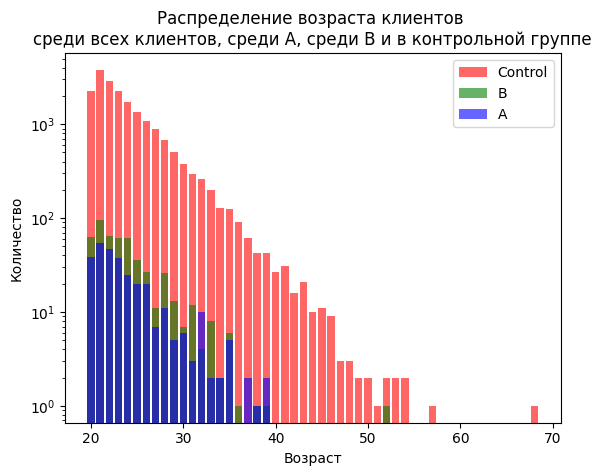

In [ ]:
plt.title('Распределение возраста клиентов \nсреди всех клиентов, среди A, среди B и в контрольной группе')
plt.ylabel('Количество')
plt.xlabel('Возраст')


plt.bar(x=pivot_age_wrong.columns, height=pivot_age_wrong.values[0], color='red', alpha=0.6, label='Control')
plt.bar(x=pivot_age_wrong.columns, height=pivot_age_wrong.values[1], color='green', alpha=0.6, label='B')
plt.bar(x=pivot_age_wrong.columns, height=pivot_age_wrong.values[2], color='blue', alpha=0.6, label='A')

plt.yscale('log')
plt.legend()

In [ ]:
df['AgeGroup'] = df['Age'].apply(lambda x: '20-22' if 20 <= x <= 22 else '23-68')

In [ ]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased,Control,AgeGroup
0,2003,21,Male,2023,0,0,0,1,20-22
1,2001,23,Female,2024,0,0,0,1,23-68
2,2002,22,Male,2024,0,0,0,1,20-22
3,2004,20,Male,2023,0,1,1,0,20-22
4,2003,21,Female,2024,0,0,0,1,20-22
...,...,...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,0,0,0,1,23-68
19996,2001,23,Male,2024,0,0,0,1,23-68
19997,1998,26,Male,2024,0,0,0,1,23-68
19998,2003,21,Male,2023,0,0,0,1,20-22


In [ ]:
pivot_age = df.pivot_table(values="BirthdayYear", index='AgeGroup', columns=['A', 'B', 'Control'], aggfunc="count")

pivot_age

A             0         1
B             0    1    0
Control       1    0    0
AgeGroup                 
20-22      8960  222  141
23-68     10240  278  159

In [ ]:
pivot_age_showing = pd.DataFrame({
    '20-22': pivot_age.values[0][::-1],
    '23-68': pivot_age.values[1][::-1],
}, index=['A', 'B', 'Control']).T
pivot_age_showing.style.format(precision=0).set_caption('Распределение возраста клиентов среди всех клиентов, среди A, среди B и в контрольной группе')

,A,B,Control
20-22,141,222,8960
23-68,159,278,10240


In [ ]:
pivot_since = df.pivot_table(values="BirthdayYear", index='ClientSince', columns=['A', 'B', 'Control'], aggfunc="count")

pivot_since

A                0         1
B                0    1    0
Control          1    0    0
ClientSince                 
2023          3840  300   60
2024         15360  200  240

In [ ]:
pivot_since_showing = pd.DataFrame({
    'Давний': pivot_since.values[0][::-1],
    'Недавний': pivot_since.values[1][::-1],
}, index=['A', 'B', 'Control']).T
pivot_since_showing.style.format(precision=0).set_caption('Распределение типов клиентов среди всех клиентов, среди A, среди B и в контрольной группе')

,A,B,Control
Давний,60,300,3840
Недавний,240,200,15360


Черный

In [ ]:
purc_a_old = (((df['A'] == 1) & (df['Purchased'] == 1) & (df['ClientSince'] == 2023)).sum())
purc_a_new = (((df['A'] == 1) & (df['Purchased'] == 1) & (df['ClientSince'] == 2024)).sum())

purc_b_old = (((df['B'] == 1) & (df['Purchased'] == 1) & (df['ClientSince'] == 2023)).sum())
purc_b_new = (((df['B'] == 1) & (df['Purchased'] == 1) & (df['ClientSince'] == 2024)).sum())

purc_c_old = (((df['Control'] == 1) & (df['Purchased'] == 1) & (df['ClientSince'] == 2023)).sum())
purc_c_new = (((df['Control'] == 1) & (df['Purchased'] == 1) & (df['ClientSince'] == 2024)).sum())



a_old = ((df['A'] == 1) & (df['ClientSince'] == 2023)).sum()
a_new = ((df['A'] == 1) & (df['ClientSince'] == 2024)).sum()

b_old = ((df['B'] == 1) & (df['ClientSince'] == 2023)).sum()
b_new = ((df['B'] == 1) & (df['ClientSince'] == 2024)).sum()

c_old = ((df['Control'] == 1) & (df['ClientSince'] == 2023)).sum()
c_new = ((df['Control'] == 1) & (df['ClientSince'] == 2023)).sum()


conversion = pd.DataFrame({
    'группа A': [purc_a_old / a_old, purc_a_new / a_new],
    'группа B': [purc_b_old / b_old, purc_b_new / b_new],
    'Контрольная группа': [purc_c_old / c_old, purc_c_new / c_new]
}, index=['Давние клиенты', 'Недавние клиенты'])


conversion.style.format(precision=2).set_caption('Конверсия по группам и давности клиента')

,группа A,группа B,Контрольная группа
Давние клиенты,0.20,0.20,0.20
Недавние клиенты,0.09,0.03,0.12


In [ ]:
purc_a_68 = (((df['A'] == 1) & (df['Purchased'] == 1) & (df['AgeGroup'] == '23-68')).sum())
purc_a_22 = (((df['A'] == 1) & (df['Purchased'] == 1) & (df['AgeGroup'] == '20-22')).sum())

purc_b_68 = (((df['B'] == 1) & (df['Purchased'] == 1) & (df['AgeGroup'] == '23-68')).sum())
purc_b_22 = (((df['B'] == 1) & (df['Purchased'] == 1) & (df['AgeGroup'] == '20-22')).sum())

purc_c_68 = (((df['Control'] == 1) & (df['Purchased'] == 1) & (df['AgeGroup'] == '23-68')).sum())
purc_c_22 = (((df['Control'] == 1) & (df['Purchased'] == 1) & (df['AgeGroup'] == '20-22')).sum())



a_68 = ((df['A'] == 1) & (df['AgeGroup'] == '23-68')).sum()
a_22 = ((df['A'] == 1) & (df['AgeGroup'] == '20-22')).sum()

b_68 = ((df['B'] == 1) & (df['AgeGroup'] == '23-68')).sum()
b_22 = ((df['B'] == 1) & (df['AgeGroup'] == '20-22')).sum()

c_68 = ((df['Control'] == 1) & (df['AgeGroup'] == '23-68')).sum()
c_22 = ((df['Control'] == 1) & (df['AgeGroup'] == '20-22')).sum()



conversion = pd.DataFrame({
    'группа A': [purc_a_68 / a_68, purc_a_22 / a_22],
    'группа B': [purc_b_68 / b_68, purc_b_22 / b_22],
    'Контрольная группа': [purc_c_68 / c_68, purc_c_22 / c_22]
}, index=['23-68', '20-22'])


conversion.style.format(precision=2).set_caption('Конверсия по группам и возрасту клиента')

,группа A,группа B,Контрольная группа
23-68,0.13,0.12,0.06
20-22,0.09,0.14,0.07


In [ ]:
purc_a_female = (((df['A'] == 1) & (df['Purchased'] == 1) & (df['Gender'] == 'Female')).sum())
purc_a_male = (((df['A'] == 1) & (df['Purchased'] == 1) & (df['Gender'] == 'Male')).sum())

purc_b_female = (((df['B'] == 1) & (df['Purchased'] == 1) & (df['Gender'] == 'Female')).sum())
purc_b_male = (((df['B'] == 1) & (df['Purchased'] == 1) & (df['Gender'] == 'Male')).sum())

purc_c_female = (((df['Control'] == 1) & (df['Purchased'] == 1) & (df['Gender'] == 'Female')).sum())
purc_c_male = (((df['Control'] == 1) & (df['Purchased'] == 1) & (df['Gender'] == 'Male')).sum())



a_female = ((df['A'] == 1) & (df['Gender'] == 'Female')).sum()
a_male = ((df['A'] == 1) & (df['Gender'] == 'Male')).sum()

b_female = ((df['B'] == 1) & (df['Gender'] == 'Female')).sum()
b_male = ((df['B'] == 1) & (df['Gender'] == 'Male')).sum()

c_female = ((df['Control'] == 1) & (df['Gender'] == 'Female')).sum()
c_male = ((df['Control'] == 1) & (df['Gender'] == 'Male')).sum()



conversion = pd.DataFrame({
    'группа A': [purc_a_female / a_female, purc_a_male / a_male],
    'группа B': [purc_b_female / b_female, purc_b_male / b_male],
    'Контрольная группа': [purc_c_female / c_female, purc_c_male / c_male]
}, index=['female', 'male'])


conversion.style.format(precision=2).set_caption('Конверсия по группам и полу клиента')

,группа A,группа B,Контрольная группа
female,0.14,0.12,0.06
male,0.09,0.14,0.06


In [ ]:
# #init

# possible_res = pd.DataFrame({
#     'Давность': [{'Давний': [
#                   c * (purc_a_old / a_old) - purc_c_old,
#                   (c * (purc_a_old / a_old) - purc_c_old) * (3000),
#                   (c * (purc_a_old / a_old) - purc_c_old) * (80),
#                   (c * (purc_a_old / a_old) - purc_c_old) * (3000 - 80)]},

#                  {'Недавний': [
#                   c * (purc_a_new / a_new) - purc_c_new,
#                   (c * (purc_a_new / a_new) - purc_c_new) * (3000),
#                   (c * (purc_a_new / a_new) - purc_c_new) * (80),
#                   (c * (purc_a_new / a_new) - purc_c_new) * (3000 - 80)]},],

#     'Возраст': [{'23-68': [
#                   c * (purc_a_68 / a_68) - purc_c_68,
#                   (c * (purc_a_68 / a_68) - purc_c_68) * (3000),
#                   (c * (purc_a_68 / a_68) - purc_c_68) * (80),
#                   (c * (purc_a_68 / a_68) - purc_c_68) * (3000 - 80)]},

#                  {'20-22': [
#                   c * (purc_a_22 / a_22) - purc_c_22,
#                   (c * (purc_a_22 / a_22) - purc_c_22) * (3000),
#                   (c * (purc_a_22 / a_22) - purc_c_22) * (80),
#                   (c * (purc_a_22 / a_22) - purc_c_22) * (3000 - 80)]},],

#     'Пол': [{'female': [
#                   c * (purc_a_female / a_female) - purc_c_female,
#                   (c * (purc_a_female / a_female) - purc_c_female) * (3000),
#                   (c * (purc_a_female / a_female) - purc_c_female) * (80),
#                   (c * (purc_a_female / a_female) - purc_c_female) * (3000 - 80)]},

#                  {'male': [
#                   c * (purc_a_male / a_male) - purc_c_male,
#                   (c * (purc_a_male / a_male) - purc_c_male) * (3000),
#                   (c * (purc_a_male / a_male) - purc_c_male) * (80),
#                   (c * (purc_a_male / a_male) - purc_c_male) * (3000 - 80)]},],

# }, index=['Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'])


# possible_res.style.format(precision=2).set_caption('Теоритические результаты при показе рекламы А контрольной группе при сохра')

In [ ]:
possible_res = pd.DataFrame(
    {
    'Давние': [
                  c * (purc_a_old / a_old) - purc_c_old,
                  (c * (purc_a_old / a_old) - purc_c_old) * (3000),
                  (c * (purc_a_old / a_old) - purc_c_old) * (80),
                  (c * (purc_a_old / a_old) - purc_c_old) * (3000 - 80)],
    'Недавние': [
                  c * (purc_a_new / a_new) - purc_c_new,
                  (c * (purc_a_new / a_new) - purc_c_new) * (3000),
                  (c * (purc_a_new / a_new) - purc_c_new) * (80),
                  (c * (purc_a_new / a_new) - purc_c_new) * (3000 - 80)],
}, index=[
    'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'
])

possible_res.style.format(precision=2).set_caption('Теоретические результаты при показе рекламы А контрольной группе при конверсии по давности')

,Давние,Недавние
Доп.Покупки,3072.00,1220.00
Доход от доп.покупок,9216000.00,3660000.00
Расходы на доп.рекламу,245760.00,97600.00
Прибыль от доп.покупок,8970240.00,3562400.00


In [ ]:
possible_res = pd.DataFrame(
    {
    '23-68': [
                  c * (purc_a_68 / a_68) - purc_c_68,
                  (c * (purc_a_68 / a_68) - purc_c_68) * (3000),
                  (c * (purc_a_68 / a_68) - purc_c_68) * (80),
                  (c * (purc_a_68 / a_68) - purc_c_68) * (3000 - 80)],
    '20-22': [
                  c * (purc_a_22 / a_22) - purc_c_22,
                  (c * (purc_a_22 / a_22) - purc_c_22) * (3000),
                  (c * (purc_a_22 / a_22) - purc_c_22) * (80),
                  (c * (purc_a_22 / a_22) - purc_c_22) * (3000 - 80)],
}, index=[
    'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'
])

possible_res.style.format(precision=2).set_caption('Теоретические результаты при показе рекламы А контрольной группе при конверсии по возрасту')

,23-68,20-22
Доп.Покупки,1777.09,1180.21
Доход от доп.покупок,5331283.02,3540638.30
Расходы на доп.рекламу,142167.55,94417.02
Прибыль от доп.покупок,5189115.47,3446221.28


In [ ]:
possible_res = pd.DataFrame(
    {
    'female': [
                  c * (purc_a_female / a_female) - purc_c_female,
                  (c * (purc_a_female / a_female) - purc_c_female) * (3000),
                  (c * (purc_a_female / a_female) - purc_c_female) * (80),
                  (c * (purc_a_female / a_female) - purc_c_female) * (3000 - 80)],
    'male': [
                  c * (purc_a_male / a_male) - purc_c_male,
                  (c * (purc_a_male / a_male) - purc_c_male) * (3000),
                  (c * (purc_a_male / a_male) - purc_c_male) * (80),
                  (c * (purc_a_male / a_male) - purc_c_male) * (3000 - 80)],
}, index=[
    'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'
])

possible_res.style.format(precision=2).set_caption('Теоретические результаты при показе рекламы А контрольной группе при конверсии по полу')

,female,male
Доп.Покупки,1994.71,1063.00
Доход от доп.покупок,5984142.86,3189000.00
Расходы на доп.рекламу,159577.14,85040.00
Прибыль от доп.покупок,5824565.71,3103960.00


In [ ]:
possible_res = pd.DataFrame(
    {
    'Давние': [
                  c * (purc_b_old / b_old) - purc_c_old,
                  (c * (purc_b_old / b_old) - purc_c_old) * (3000),
                  (c * (purc_b_old / b_old) - purc_c_old) * (80),
                  (c * (purc_b_old / b_old) - purc_c_old) * (3000 - 80)],
    'Недавние': [
                  c * (purc_b_new / b_new) - purc_c_new,
                  (c * (purc_b_new / b_new) - purc_c_new) * (3000),
                  (c * (purc_b_new / b_new) - purc_c_new) * (80),
                  (c * (purc_b_new / b_new) - purc_c_new) * (3000 - 80)],
}, index=[
    'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'
])

possible_res.style.format(precision=2).set_caption('Теоретические результаты при показе рекламы B контрольной группе при конверсии по давности')

,Давние,Недавние
Доп.Покупки,3072.00,116.00
Доход от доп.покупок,9216000.00,348000.00
Расходы на доп.рекламу,245760.00,9280.00
Прибыль от доп.покупок,8970240.00,338720.00


In [ ]:
possible_res = pd.DataFrame(
    {
    '23-68': [
                  c * (purc_b_68 / b_68) - purc_c_68,
                  (c * (purc_b_68 / b_68) - purc_c_68) * (3000),
                  (c * (purc_b_68 / b_68) - purc_c_68) * (80),
                  (c * (purc_b_68 / b_68) - purc_c_68) * (3000 - 80)],
    '20-22': [
                  c * (purc_b_22 / b_22) - purc_c_22,
                  (c * (purc_b_22 / b_22) - purc_c_22) * (3000),
                  (c * (purc_b_22 / b_22) - purc_c_22) * (80),
                  (c * (purc_b_22 / b_22) - purc_c_22) * (3000 - 80)],
}, index=[
    'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'
])

possible_res.style.format(precision=2).set_caption('Теоретические результаты при показе рекламы B контрольной группе при конверсии по возрасту')

,23-68,20-22
Доп.Покупки,1710.20,2177.57
Доход от доп.покупок,5130604.32,6532702.70
Расходы на доп.рекламу,136816.12,174205.41
Прибыль от доп.покупок,4993788.20,6358497.30


In [ ]:
possible_res = pd.DataFrame(
    {
    'female': [
                  c * (purc_b_female / b_female) - purc_c_female,
                  (c * (purc_b_female / b_female) - purc_c_female) * (3000),
                  (c * (purc_b_female / b_female) - purc_c_female) * (80),
                  (c * (purc_b_female / b_female) - purc_c_female) * (3000 - 80)],
    'male': [
                  c * (purc_b_male / b_male) - purc_c_male,
                  (c * (purc_b_male / b_male) - purc_c_male) * (3000),
                  (c * (purc_b_male / b_male) - purc_c_male) * (80),
                  (c * (purc_b_male / b_male) - purc_c_male) * (3000 - 80)],
}, index=[
    'Доп.Покупки', 'Доход от доп.покупок', 'Расходы на доп.рекламу', 'Прибыль от доп.покупок'
])

possible_res.style.format(precision=2).set_caption('Теоретические результаты при показе рекламы B контрольной группе при конверсии по полу')

,female,male
Доп.Покупки,1718.71,2104.84
Доход от доп.покупок,5156121.34,6314517.24
Расходы на доп.рекламу,137496.57,168387.13
Прибыль от доп.покупок,5018624.77,6146130.11
